In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
from google.colab import files

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.

!kaggle datasets download -d jayaprakashpondy/ecgimages

 93% 266M/286M [00:01<00:00, 127MB/s]
100% 286M/286M [00:02<00:00, 145MB/s]


In [ ]:
file_name = "/content/ecgimages.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/train/Myocardial_infraction')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(299,299))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/train/Normal_person')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(299,299))
      X.append(img)
      y.append('N')
print(y)

  0%|          | 0/239 [00:00<?, ?it/s]

M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M


  0%|          | 0/284 [00:00<?, ?it/s]

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',

In [ ]:

print(y)

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',

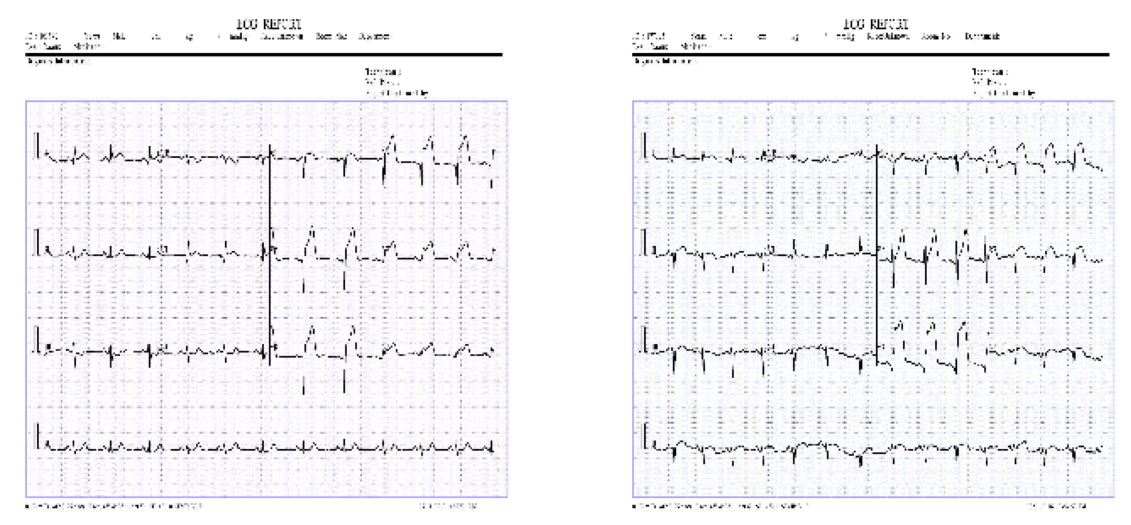

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
for i in range(2):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
print(len(X))
print(len(y))


523
523


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)



Shape of an image in X_train:  (299, 299, 3)
Shape of an image in X_test:  (299, 299, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)
from keras.applications import InceptionV3

X_train Shape:  (350, 299, 299, 3)
X_test Shape:  (173, 299, 299, 3)
y_train Shape:  (350, 2)
y_test Shape:  (173, 2)


In [ ]:
img_rows, img_cols = 299, 299

In [ ]:
inception = InceptionV3(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
for (i,layer) in enumerate(inception.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model, num_classes):
    # creates the top or head of the model that will be
    # placed ontop of the bottom layers

        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(num_classes,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(inception, num_classes)

model = Model(inputs = inception.input, outputs = FC_Head)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:

model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/20
11/11 [==============================] - 125s 11s/step - loss: 55.2985 - accuracy: 0.5057 - val_loss: 28.8543 - val_accuracy: 0.4855
Epoch 2/20
11/11 [==============================] - 115s 11s/step - loss: 15.2940 - accuracy: 0.5343 - val_loss: 3.3228 - val_accuracy: 0.5145
Epoch 3/20
11/11 [==============================] - 109s 10s/step - loss: 1.5083 - accuracy: 0.6086 - val_loss: 1.3768 - val_accuracy: 0.5376
Epoch 4/20
11/11 [==============================] - 115s 11s/step - loss: 0.6796 - accuracy: 0.7057 - val_loss: 0.5035 - val_accuracy: 0.7572
Epoch 5/20
11/11 [==============================] - 120s 11s/step - loss: 0.5654 - accuracy: 0.7200 - val_loss: 0.4744 - val_accuracy: 0.7399
Epoch 6/20
11/11 [==============================] - 116s 11s/step - loss: 0.4985 - accuracy: 0.7829 - val_loss: 0.7481 - val_accuracy: 0.6301
Epoch 7/20
11/11 [==============================] - 115s 11s/step - loss: 0.6040 - accuracy: 0.7000 - val_loss: 0.4238 - val_accuracy: 0.7514
Epo

In [ ]:
model.save('CVD_prediction_ECG.h5')

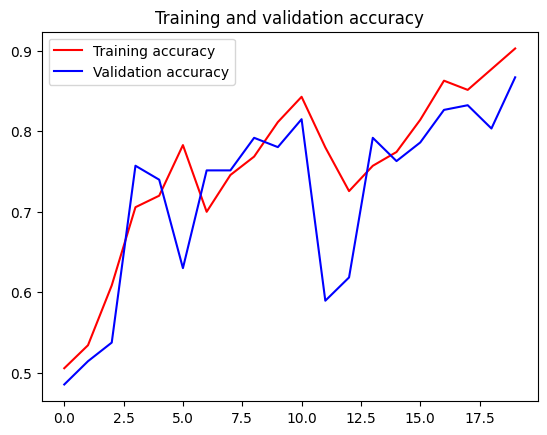

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
new_data = []
preprocessed_data = []

os.chdir('/content/testing')
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img,(299,299))
  img_array = np.array(img)

img_array.shape


  0%|          | 0/1 [00:00<?, ?it/s]

(299, 299, 3)

In [ ]:
img_array = img_array.reshape(1,299,299,3)

img_array.shape

(1, 299, 299, 3)

  0%|          | 0/1 [00:00<?, ?it/s]

(-0.5, 2212.5, 1571.5, -0.5)

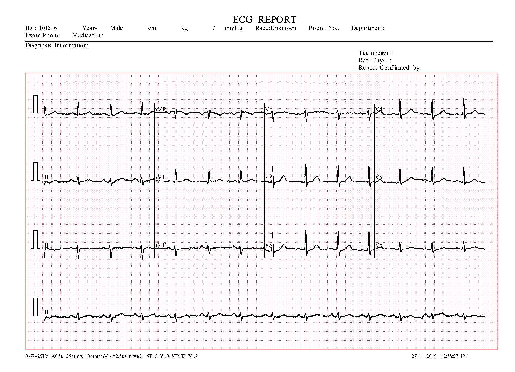

In [ ]:
from tensorflow.keras.preprocessing import image

os.chdir('/content/testing')
for i in tqdm(os.listdir()):
    img = image.load_img(i)

plt.imshow(img, interpolation='nearest')
plt.axis('off')


In [ ]:
a = model.predict(img_array)

a


1/1 [==============================] - 0s 394ms/step


array([[0.10065437, 0.89934564]], dtype=float32)

In [ ]:
class_labels = np.argmax(a, axis=1)

In [ ]:

print("Predicted Class Labels:", class_labels)


Predicted Class Labels: [1]


In [ ]:
import pandas as pd

Y = pd.DataFrame(y,columns=["CVD"])

Y["CVD Numerical"] = Y["CVD"].\
apply(lambda x: list(Y["CVD"].unique()).index(x))

Y


,CVD,CVD Numerical
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0
...,...,...
518,N,1
519,N,1
520,N,1
521,N,1
